# Лабораторная работа 4. Решающие деревья и леса. Кластеризация и понижение размерности.

## Решающие деревья и леса

In [4]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import KFold, cross_val_score
import matplotlib.pylab as plt
%matplotlib inline

In [5]:
data = pd.read_csv('heart_dat.txt', sep = ' ')

In [6]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholestoral_in_mg/dl,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,the_slope_of_the_peak_exercise,number_of_major_vessels,thal,Absence_(1)_or_presence_(2)_of_heart_disease
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,0
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,0
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


In [7]:
data.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'serum_cholestoral_in_mg/dl', 'fasting_blood_sugar',
       'resting_electrocardiographic_results', 'maximum_heart_rate_achieved',
       'exercise_induced_angina', 'oldpeak', 'the_slope_of_the_peak_exercise',
       'number_of_major_vessels', 'thal',
       'Absence_(1)_or_presence_(2)_of_heart_disease'],
      dtype='object')

In [8]:
len(data.columns)

14


Выделите признаки в переменную X, а целевую зависимость — в y.

In [9]:
X,y = data[data.columns[:-1]], data[data.columns[-1]]

In [10]:
X.shape

(270, 13)

In [11]:
X.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'serum_cholestoral_in_mg/dl', 'fasting_blood_sugar',
       'resting_electrocardiographic_results', 'maximum_heart_rate_achieved',
       'exercise_induced_angina', 'oldpeak', 'the_slope_of_the_peak_exercise',
       'number_of_major_vessels', 'thal'],
      dtype='object')

In [12]:
y.value_counts()

1    150
0    120
Name: Absence_(1)_or_presence_(2)_of_heart_disease, dtype: int64

In [13]:
y = y.map(lambda s: s+1)

In [14]:
y.value_counts()

2    150
1    120
Name: Absence_(1)_or_presence_(2)_of_heart_disease, dtype: int64

In [15]:
kfold = KFold(X.shape[0], n_folds=5, shuffle=True, random_state=1)


Теперь воспользуемся функцией cross_val_score для оценки качества. Она принимает следующие параметры:
estimator — в данном случае им будет решающее дерево DecisionTreeClassifier. Здесь и далее фиксируйте параметр random_state у решающего дерева, чтобы результат был воспроизводим. В этом пункте ограничения на другие параметры не накладываются
X и y — матрица "объект-признак" и значение целевой переменной соответственно
scoring просто указать roc_auc_score
cv — передать созданный ранее kfold
Эта функция возвращает массив значений качества на каждом разбиении.

**(1 балл)** Посчитайте среднее, минимальное и максимальное качество, которое получатеся с помощью решающего дерева.

In [16]:
quality_metr = cross_val_score(DecisionTreeClassifier(),X, y, cv=kfold)
quality_metr

array([ 0.77777778,  0.75925926,  0.7962963 ,  0.75925926,  0.77777778])

In [17]:
print('Лучшее значение качества при 5-тикратном разбиении:%.4f' % (max(quality_metr)))
print('Худшее значение качества при 5-тикратном разбиении:%.4f' % (min(quality_metr)))
print('Среднее значение качества при 5-тикратном разбиении:%.4f' % (quality_metr.mean()))

Лучшее значение качества при 5-тикратном разбиении:0.7963
Худшее значение качества при 5-тикратном разбиении:0.7593
Среднее значение качества при 5-тикратном разбиении:0.7741



**(0.5 балла)** Теперь попробуем посмотреть изменится ли оно, если ограничить высоту дерева. Зафиксируйте высоту дерева равной 3 и повторите аналогичные действия. Увеличились ли показания качества по сравнению с прошлым разом?

In [18]:
quality_metr = cross_val_score(DecisionTreeClassifier(max_depth=3),X, y, cv=kfold)
quality_metr

array([ 0.74074074,  0.77777778,  0.81481481,  0.83333333,  0.77777778])

In [19]:
print('Лучшее значение качества при 5-тикратном разбиении:%.4f' % (max(quality_metr)))
print('Худшее значение качества при 5-тикратном разбиении:%.4f' % (min(quality_metr)))
print('Среднее значение качества при 5-тикратном разбиении:%.4f' % (quality_metr.mean()))

Лучшее значение качества при 5-тикратном разбиении:0.8333
Худшее значение качества при 5-тикратном разбиении:0.7407
Среднее значение качества при 5-тикратном разбиении:0.7889



**(0.5 балла)** А принесет ли улучшение, если ограничить высоту дерева 1?

In [20]:
quality_metr = cross_val_score(DecisionTreeClassifier(max_depth=1),X, y, cv=kfold)
quality_metr

array([ 0.64814815,  0.75925926,  0.68518519,  0.72222222,  0.77777778])

In [21]:
print('Лучшее значение качества при 5-тикратном разбиении:%.4f' % (max(quality_metr)))
print('Худшее значение качества при 5-тикратном разбиении:%.4f' % (min(quality_metr)))
print('Среднее значение качества при 5-тикратном разбиении:%.4f' % (quality_metr.mean()))

Лучшее значение качества при 5-тикратном разбиении:0.7778
Худшее значение качества при 5-тикратном разбиении:0.6481
Среднее значение качества при 5-тикратном разбиении:0.7185



**(1 балл)** Напишите почему наложение ограничения на высоту дерева влияет на его обобщающую способность. Почему деревья глубиной 1 по одиночке могут быть неэффективны?

- Глубина дерева отвечает за степень соответствия предсказания дерева объектам обучающей выборки; чем больше глубина, тем больше дерево подстраивается под обучающую выборку, под выбросы, тем менее его обобщающая способность, т.е качество на тестовой выборке
- Глубина 1 одиночного дерева 


**(2 балла)**
Теперь попробуем провести аналогичные эксперименты для случая решающего леса RandomForestClassifier. Рассмотрите 10, 50 и 100 деревьев в случайном лесу (поле n_estimators) для высоты деревьев по умолчанию, 3 и 1. Не забудьте зафиксировать random_state. Улучшается ли качество при увеличении количества деревьев в лесу? Сильно ли влияет ограничение на высоту деревьев при построении леса?

In [27]:
kfold = KFold(X.shape[0], n_folds=5, shuffle=True, random_state=1)

In [28]:
n_estimators_list = [10,50,100]
max_depth_list = [1,3]

In [45]:
def quality_metr_Rand_For_class(n_estimators_list, max_depth_list):
    global quality_dict,do_print
    quality_dict = {}
    kfold = KFold(X.shape[0], n_folds=5, shuffle=True, random_state=1)
    for n_estimators in n_estimators_list:
        for max_depth in max_depth_list:
            quality = cross_val_score(RandomForestClassifier(max_depth=max_depth, n_estimators = n_estimators),X, y, cv=kfold).mean()
            if max_depth in quality_dict.keys():
                quality_dict[max_depth].append(quality)
            else:
                quality_dict[max_depth] = []
                quality_dict[max_depth].append(quality)
            if do_print == True:
                print('------------')
                print('n_estimators:',n_estimators)
                print('max_depth:', max_depth)
                print(quality)
    do_print = False

In [46]:
do_print = True
quality_metr_Rand_For_class(n_estimators_list, max_depth_list)

------------
n_estimators: 10
max_depth: 1
0.785185185185
------------
n_estimators: 10
max_depth: 3
0.822222222222
------------
n_estimators: 50
max_depth: 1
0.814814814815
------------
n_estimators: 50
max_depth: 3
0.848148148148
------------
n_estimators: 100
max_depth: 1
0.8
------------
n_estimators: 100
max_depth: 3
0.862962962963


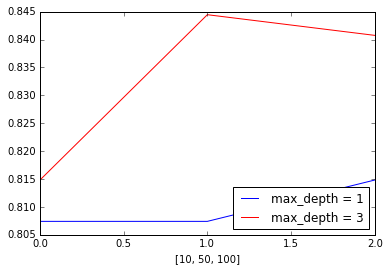

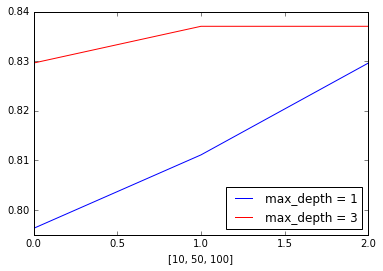

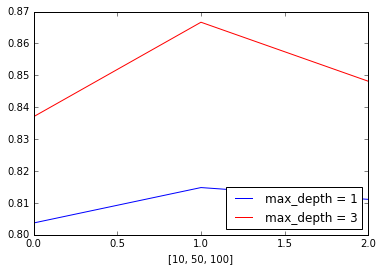

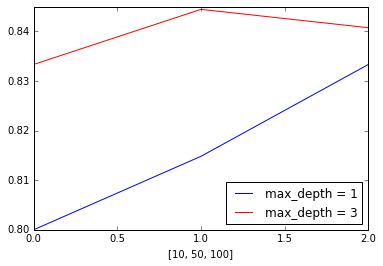

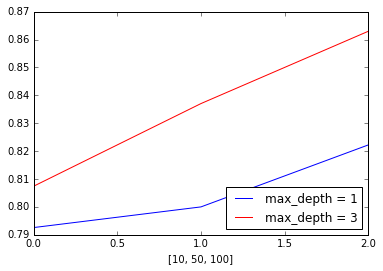

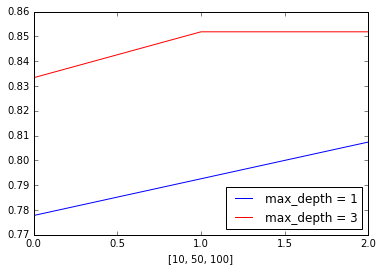

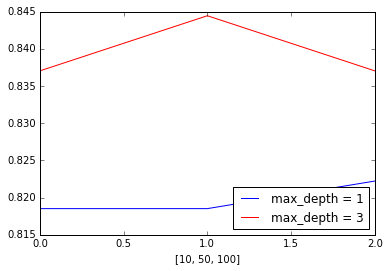

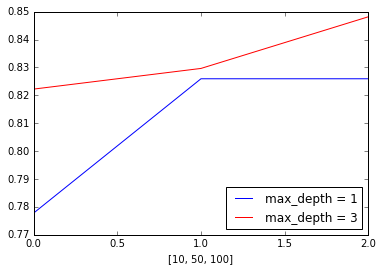

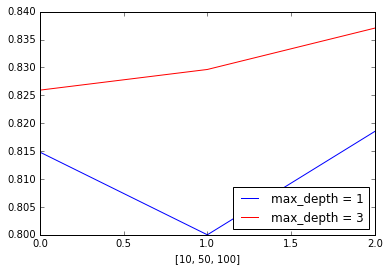

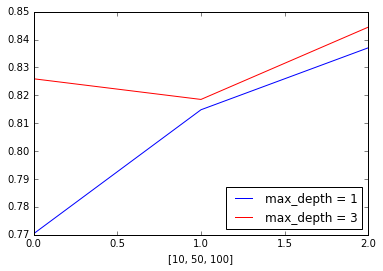

In [47]:
for i in range(10):
    quality_metr_Rand_For_class(n_estimators_list, max_depth_list)
    plt.plot(quality_dict[1],color='b')
    plt.plot(quality_dict[3],color='r')
    plt.legend(['max_depth = 1','max_depth = 3'], loc = 4)
    plt.xlabel(n_estimators_list)
    plt.figure()

In [48]:
quality_dict

{1: [0.77037037037037037, 0.81481481481481466, 0.83703703703703702],
 3: [0.82592592592592595, 0.81851851851851853, 0.84444444444444444]}

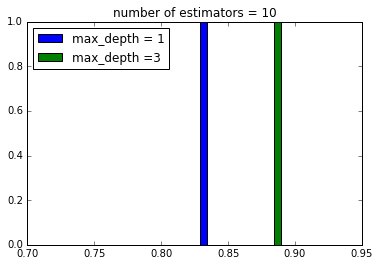

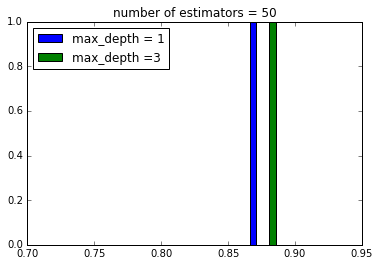

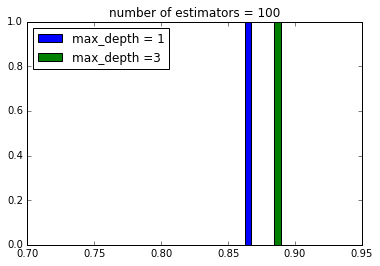

In [49]:
for n_estimators in n_estimators_list:
    for max_depth in max_depth_list:
        quality_metr = cross_val_score(RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators),X, y, cv=kfold)
        plt.hist(quality_metr.mean(),rwidth=0.05)
        plt.subplot()
    plt.legend(['max_depth = '+str(max_depth_list[0]),'max_depth ='+str(max_depth_list[1])],loc = 2)
    plt.title('number of estimators = '+ str(n_estimators))
    plt.xlim([0.7,0.95])
    plt.figure()

Ограничение на высоту деревьев влияет на качество модели. В среднем, чем выше дерево, тем лучше качество(для случая высоты 1 и 3). В случае значения глубины дерева 3 чем большее кол-во деревьев участвует в голосовании, тем реже  модель оказывается качественной, в случае 1 - при увеличении кол-ва деревьев качество менее зависит от того, какой признак выбран для разбиения единственного листа и модель сохраняет или увеличивает качество чаще(8 случаев из 10), чем в случае глубины, равной 3(6 случаев из 10)

## Кластеризация

In [22]:
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score, silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pylab as plt
%matplotlib inline

В этой части работы вы будете работать с уже известным вам набором данных изображений цифр, но в данном случае мы рассмотрим задачу кластеризации. Целью работы будет посмотреть можно ли разделить изображения цифр по классам, не зная их истинных меток.
Для начала вам потребуется загрузить набор данных, используя функцию load_digits, в переменную data:

In [13]:
data = load_digits()

In [18]:
X = data.data
y = data.target

In [21]:
X.shape

(1797, 64)

In [22]:
y.shape

(1797,)

#### (1 балл) Построение кластеризации будем производить с помощью метода К-средних. Для этого вам нужно сделать следующее:
 - создать объект KMeans, имеющий следующие интересные для нас параметры:
 - количество кластеров n_clusters
 - random_state — его следует зафиксировать для воспроизводимости результата
 - вызвать метод fit_predict, передав на вход переменную X и сохранив результаты в переменную predicted_labels

In [30]:
clustKM = KMeans(n_clusters=len(set(y)), random_state=1)

In [32]:
predicted_labels = clustKM.fit_predict(X)

#### (2 балла) Теперь вычислите значения указанных выше метрик для полученной кластеризации. Хорошее ли качество имеет данная кластеризация, исходя из интерпретации метрик?

In [68]:
hmg = homogeneity_score(y, predicted_labels)
print('%.2f%% чисел отнесены к правильному кластеру' % (hmg*100))

73.54% чисел отнесены к правильному кластеру


In [69]:
slh = silhouette_score(X, predicted_labels)
slh

0.18209680004777681

*Качество плохое: только 73,5% чисел кластеризованы верно, при этом кластера перекрываются, т.к значение silhouette_score близко к 0*

#### (1 балл) 
Иногда полезно бывает посмотреть на результаты кластеризации. Поэтому воспользуемся методами уменьшения размерности, чтобы визуализировать результаты кластеризации. Для этих целей будем использовать два метода PCA, который основан на получении новых признаков с помощью линейной комбинации старых, а так же tSNE, который преобразует пространство более сложным образом, пытаясь оставить рядом объекты, которые были близки в исходном пространстве. Эти методы имеют схожий интерфейс, поэтому в обоих случаях последовательность дейтствий будет заключаться в следующем:
- создать соответствующий объект, указав количество компонент n_components равным 2
- вызвать метод fit_transform, передав переменную X и сохранив результат в переменные X_pca и X_tsne соответственно

Обратите внимание, что преобразование tSNE может вычисляться некоторое время (несколько минут).

In [49]:
tsne = TSNE(n_components=2)

In [50]:
%%time
X_tsne = tsne.fit_transform(X)

Wall time: 17.9 s


In [51]:
pca = PCA(n_components = 2)

In [53]:
%%time
X_pca = pca.fit_transform(X)

Wall time: 23 ms


#### (1 балл)
Теперь выполните 2 кластеризации, но в качестве матрицы "объекты-признаки" передавайте полученные ранее X_pca и X_tsne. Сохраните результаты предсказания в переменные predicted_labels_pca и predicted_labels_tsne соответственно. Посчитайте качество каждой кластеризации с помощью указанных ранее метрик качества.

**TSNE**

In [55]:
predicted_labels_tsne = clustKM.fit_predict(X_tsne)

In [62]:
hmg_tsne = homogeneity_score(y, predicted_labels_tsne)
print('%.2f%% чисел отнесены к правильному кластеру' % (homogeneity_score(y, predicted_labels_tsne)*100))

87.06% чисел отнесены к правильному кластеру


In [63]:
slh_tsne = silhouette_score(X, predicted_labels_tsne)
slh_tsne

0.16234683818301865

**PCA**

In [58]:
predicted_labels_pca = clustKM.fit_predict(X_pca)

In [61]:
hmg_pca = homogeneity_score(y, predicted_labels_pca)
print('%.2f%% чисел отнесены к правильному кластеру' % (hmg_pca*100))

52.47% чисел отнесены к правильному кластеру


In [64]:
slh_pca = silhouette_score(X, predicted_labels_pca)
slh_pca

0.082130403225589677

**(1 балл)** Сильно ли отличается качество новых кластеризаций от исходной для каждого способа сжатия размерности? Нашелся ли способ уменьшения размерности, который позволяет достичь наилучшего качества по обеим метрикам?

In [75]:
metrics = {'PCA':{'hmg':hmg_pca,'slh':slh_pca}, 'TSNE':{'hmg':hmg_tsne,'slh':slh_tsne}}
for metric in metrics:
    print('В случае %s верно разнесено по кластерам на %.2f%% больше чисел, чем в исходном варианте' % 
          (metric, (metrics[metric]['hmg'] - hmg)*100))
    print('Степень перекрываемости кластеров больше на %.4f' % (slh - metrics[metric]['slh']))

В случае PCA верно разнесено по кластерам на -21.07% больше чисел, чем в исходном варианте
Степень перекрываемости кластеров больше на 0.1000
В случае TSNE верно разнесено по кластерам на 13.52% больше чисел, чем в исходном варианте
Степень перекрываемости кластеров больше на 0.0197


- Намного хуже показал себя способ сжатия размерности PCA
- TSNE лучше в части верно отнесенных чисел к класетрам, но немного хуже в части перекрытия кластеров

In [79]:
def plot_embedding(X, y, predicted_labels, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(10, 10))
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(predicted_labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)
    plt.show()

**(1 балл)** Для каждой из матриц X_pca и X_tsne и результатов соответствующих кластеризаций (predicted_labels_pca и predicted_labels_tsne) вызовите функцию plot_embedding.

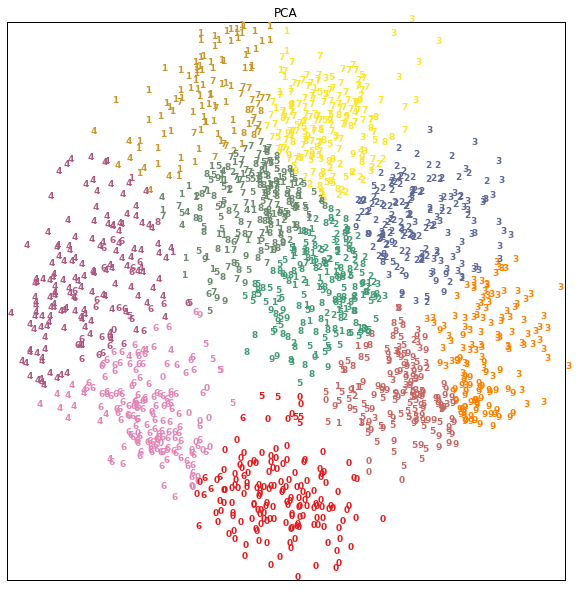

In [81]:
plot_embedding(X_pca,y,predicted_labels_pca,'PCA')

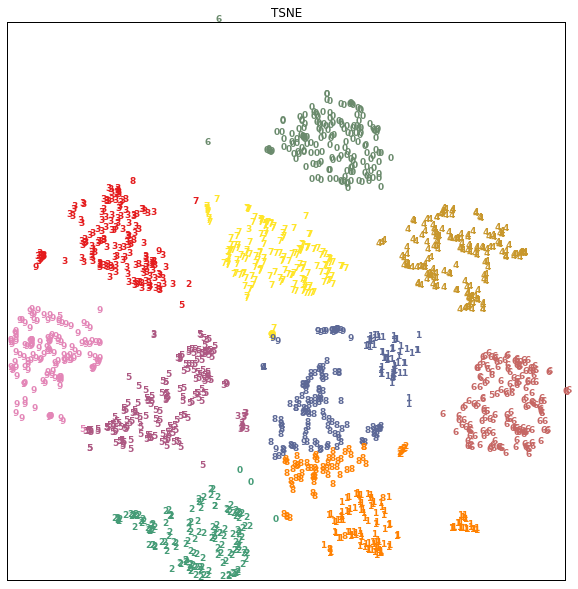

In [82]:
plot_embedding(X_tsne,y,predicted_labels_tsne,'TSNE')

**(2 балла)** Проанализируйте полученные результаты:
- какой из трех методов кластеризации: на исходных признаках, на признаках, полученных с помощью PCA или tSNE дал наилучший результат по обеим метрикам - PCA показал себя хуже всего по обеим метрикам, а TSNE лучше исходного по метрике hmg(более, чем на 13%), но хуже по метрике slh
- какой из методов сжатия размерности дает наилучшую визуализацию на плоскости? TSNE
- можно ли сказать, что результаты визуализации согласуются с метриками: если кластеры кажутся отделимыми визуально, то и значения метрик выше? ДА, визуализация TSNE лечше, кластеры явно отделены, при этом по метрике slh TSNE превосходит PCA на 0.08
- как вы думаете: если увеличить число кластеров (то есть взять не 10, а 12, 15 и пр.) может ли кластеризация быть более качественной? Почему? Врядли, поскольку вероятнее, что большее кол-во кластеров будет пересекаться, хотя это зависит от объектов кластера, например, двузначные числа скорее всего будут не так сильно пересекаться с однозначными, но будут сильно пересекаться между собой. Если сейчас 8 сильно путается с 9 и с 1, то скорее всего будут путаться и 88, 99, 89,98, 18,19,81 и т.д